/opt/conda/envs/pan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModelZipper is ready for launch🚀 | Current Version🦄 >>> 0.2.7 <<< | AOE Time🕒 2024-05-24 15:42:24
begin to read data from /vepfs/wcf/G/zecheng/Retrieval_Head/results/evaluation/llama-2-7b-80k_musican_girl_case1.jsonl | file size: 12.47 KB | file type: jsonl
begin to read data from /vepfs/wcf/G/zecheng/Retrieval_Head/results/evaluation/llama-2-7b-80k_musican_girl_case2.jsonl | file size: 12.62 KB | file type: jsonl
begin to read data from /vepfs/wcf/G/zecheng/Retrieval_Head/results/evaluation/llama-2-7b-80k_musican_girl_case3.jsonl | file size: 12.27 KB | file type: jsonl
begin to read data from /vepfs/wcf/G/zecheng/Retrieval_Head/results/evaluation/llama-2-7b-80k_musican_girl_case4.jsonl | file size: 12.27 KB | file type: jsonl
begin to read data from /vepfs/wcf/G/zecheng/Retrieval_Head/results/evaluation/llama-2-7b-80k_musican_girl_case5.jsonl | file size: 12.52 KB | file type: jsonl
begin to read data from /vepfs/wcf/G/zecheng/Retrieval_Head/results/evaluation/llama-2-7b-80k_musican_

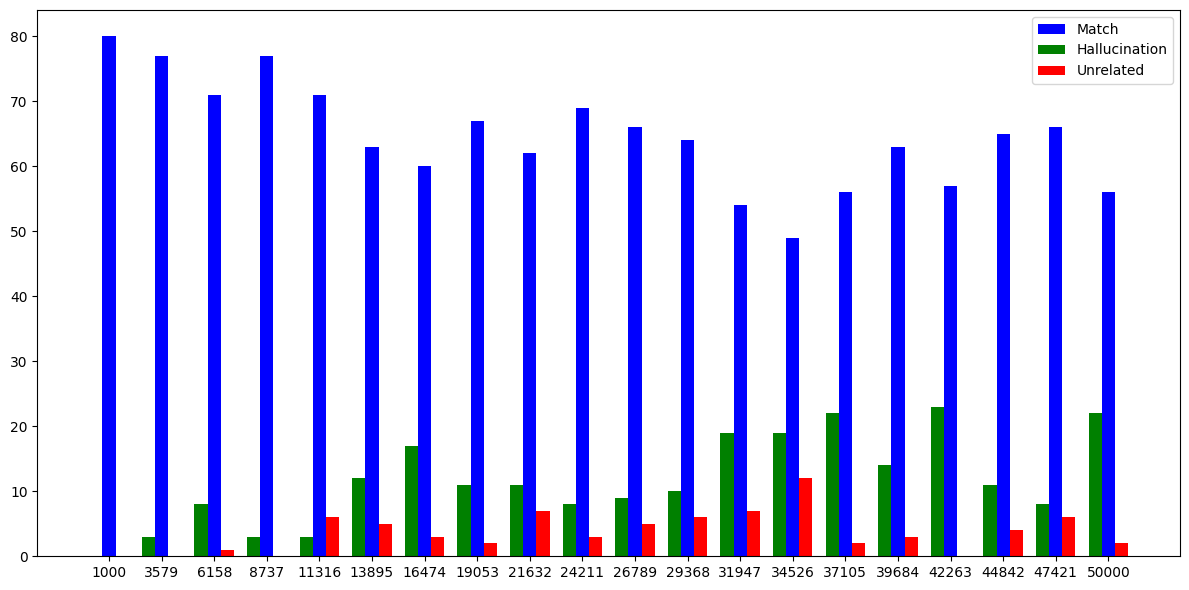

In [1]:
from modelzipper.tutils import *

dir = "/vepfs/wcf/G/zecheng/Retrieval_Head/results/evaluation"
case_ids = list(range(1, 9))
eval_files = [os.path.join(dir, f"llama-2-7b-80k_musican_girl_case{id}.jsonl") for id in case_ids]
scores = {"Match": 1, "Conflict": -1, "Unrelated": 0}


res_dict, res_lst = dict(), list()
for eval_file in eval_files:
    base_name = os.path.basename(eval_file)
    eval_res = auto_read_data(eval_file)
    

    for eval in eval_res:
        ctx_length, depth = eval["ctx_length"], eval["depth"]
        if ctx_length not in res_dict:
            res_dict[ctx_length] = [0, 0, 0]  # match, conflict, unrelated

        evaluation = eval["evaluation"].strip()
       
        if evaluation.lower() == "match":
            res_dict[eval["ctx_length"]][0] += 1
        elif evaluation.lower() == "conflict":
            res_dict[eval["ctx_length"]][1] += 1
        else:
            res_dict[eval["ctx_length"]][2] += 1
    
for ctx_length in res_dict:
    res_lst.append({"ctx_length": ctx_length, "match": res_dict[ctx_length][0], "conflict": res_dict[ctx_length][1], "unrelated": res_dict[ctx_length][2]})

res_lst = sorted(res_lst, key=lambda x: int(x["ctx_length"]), reverse=False)
ctx_length_lst = [res["ctx_length"] for res in res_lst]
ax_lst = list(range(len(ctx_length_lst)))
match_lst = [res["match"] for res in res_lst]
conflict_lst = [res["conflict"] for res in res_lst]
unrelated_lst = [res["unrelated"] for res in res_lst]

bar_width = 0.25
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(ax_lst, match_lst, color='b', label='Match', width=bar_width, align='center')
ax.bar([x - bar_width for x in ax_lst], conflict_lst, label='Hallucination', width=bar_width, align='center', color='green')
ax.bar([x + bar_width for x in ax_lst], unrelated_lst, label='Unrelated', width=bar_width, align='center', color='red')

ax.set_xticks(ax_lst)
ax.set_xticklabels(ctx_length_lst)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)

plt.tight_layout()
plt.show()



